In [145]:
from graphviz import Digraph
from micrograd.engine import Value

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    nodes, edges = trace(root)
    dot = Digraph(format="svg", graph_attr={'rankdir': 'LR'}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f | grad %4f }" % (n.label,n.data,n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [146]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data + other.data, (self,other), "+")
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self,other), "*")

In [147]:
a= Value(2.0, label="a")
b = Value(-3.0, label="b")
c= Value(10.0, label="c")
e = a*b; e.label= "e"
d = e+c; d.label = "d"
f = Value(-2.0, label="f")
L = d*f; L.label = "L"
L

Value(data=-8.0)

In [148]:
e._op

'*'

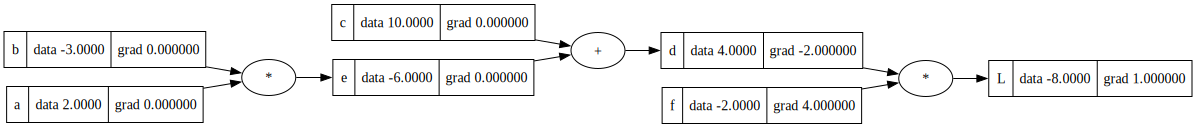

In [153]:
draw_dot(L)

In [150]:
L.grad = 1.0

# Calculating gradient of d w.r.t. c
dd/dc = ?
d = c + e
(f(x+h) - f(x)) / h
((c + h)+e - c + e)/h
c + e + h - c - e / h
h/h = 1

In [ ]:
# Calculating gradient of L w.r.t. d
L = d*f
dL/dd = "?" # (answer is f (-2), if u know calculus)

# Lets derive it
# (f(x+h) - f(x)) / h
# so increaing d by h ==>   ((d+h)* f - d*f )/h
# ==> (df+ hf - df) / h   ==> hf/f = f  (Hence andswer is -2.0)



In [152]:
a + b  = c

10 + 5 = 15

# Derivativve of c w.r.t. c

dc/dc = 1

# Derivative of c w.r.t. b
dc/db == ?

h = 0.0001

(b+h - b)/h

5+0.0001 - 5 / 0.0001
5.0001 - 5 / 0.0001
 = 1


# ( f(x+h) - f(x)) / h
